In [219]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy

%matplotlib inline

In [220]:
plt.rcParams["figure.figsize"] = [12, 7]

In [221]:
sns.set()

In [222]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [223]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [224]:
# Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (255 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)

# HELPER FUNCTIONS 

In [225]:
def split_row(row):
    if isinstance(row, str):
        return row.split(";")

In [226]:
def make_df(df, col):
    cats = {}
    for i in col.map(split_row):
        for j in i:
            cats[j] = 0
    for i in col.map(split_row):
        for j in i:
            cats[j] += 1
    df = pd.DataFrame(
        data=[i for i in cats.items()], columns=["cat", "count"]
    ).set_index("cat")
    return df

# Modalidad
---
- Modalidad de trabajo de los encuestados.

## GENERAL

In [228]:
# Cantidad de respuestas.
df["modalidad"].shape

(342,)

In [229]:
# Conteo de respuestas vacias.
df["modalidad"].isna().sum()

0

In [230]:
df["modalidad"].value_counts()

Remoto        145
Hibrído       110
Presencial     78
Ninguna         9
Name: modalidad, dtype: int64

In [231]:
df["modalidad"].value_counts(normalize=True)

Remoto        0.423977
Hibrído       0.321637
Presencial    0.228070
Ninguna       0.026316
Name: modalidad, dtype: float64

<AxesSubplot:title={'center':'Modalidad de Trabajo'}>

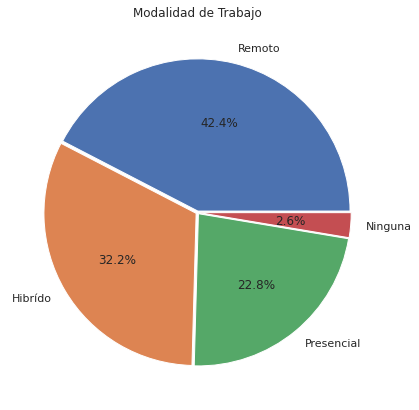

In [248]:
df["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    title="Modalidad de Trabajo",
    explode=(0.01, 0.01, 0.01, 0.01),
    autopct="%1.1f%%",
    ylabel="",
)

In [233]:
df["modalidad"].value_counts().keys()

Index(['Remoto', 'Hibrído', 'Presencial', 'Ninguna'], dtype='object')

# Modalidad de trabajo por genero.
---

In [234]:
generos = df.groupby("género")

## Genero no definido.

In [235]:
generos.get_group("NO COMPARTO")["modalidad"].value_counts(normalize=True)

Remoto     0.666667
Ninguna    0.166667
Hibrído    0.166667
Name: modalidad, dtype: float64

<AxesSubplot:title={'center':'Modalidad de trabajo. (GENERO -> NO DEFINIDO)'}>

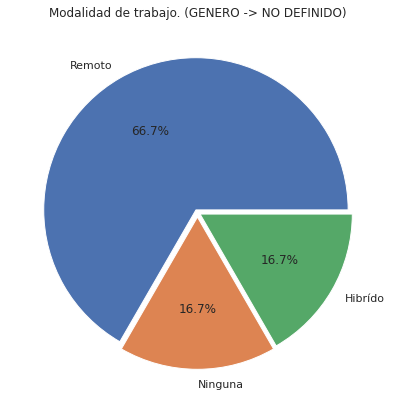

In [305]:
generos.get_group("NO COMPARTO")["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%1.1f%%",
    explode=(0.02, 0.03, 0.02),
    label="",
    title="Modalidad de trabajo. (GENERO -> NO DEFINIDO)",
)

## Hombres

In [237]:
generos.get_group("HOMBRE")["modalidad"].value_counts(normalize=True)

Remoto        0.419355
Hibrído       0.336918
Presencial    0.215054
Ninguna       0.028674
Name: modalidad, dtype: float64

/home/torrezmn/Documents/DS_ENV/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:title={'center':'Modalidad de trabajo. (GENERO -> HOMBRE)'}>

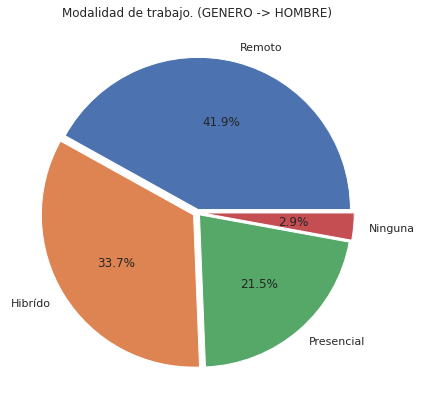

In [304]:
generos.get_group("HOMBRE")["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    explode=(0.02, 0.03, 0.02, 0.03),
    autopct="%1.1f%%",
    label="",
    title="Modalidad de trabajo. (GENERO -> HOMBRE)",
)

## Mujer

In [239]:
generos.get_group("MUJER")["modalidad"].value_counts(normalize=True)

Remoto        0.408163
Presencial    0.367347
Hibrído       0.224490
Name: modalidad, dtype: float64

<AxesSubplot:title={'center':'Modalidad de trabajo. (GENERO -> MUJER)'}>

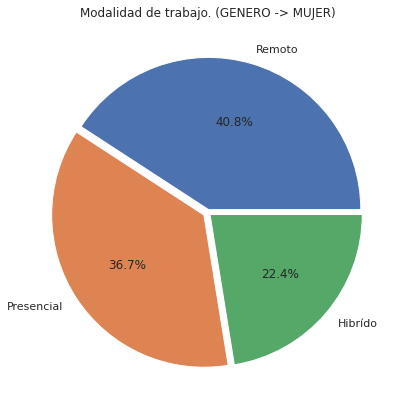

In [303]:
generos.get_group("MUJER")["modalidad"].value_counts(normalize=True).plot(
    kind="pie",
    explode=(0.02, 0.03, 0.02),
    label="",
    autopct="%1.1f%%",
    title="Modalidad de trabajo. (GENERO -> MUJER)",
)

## COMPARATIVA TODOS LOS GENEROS

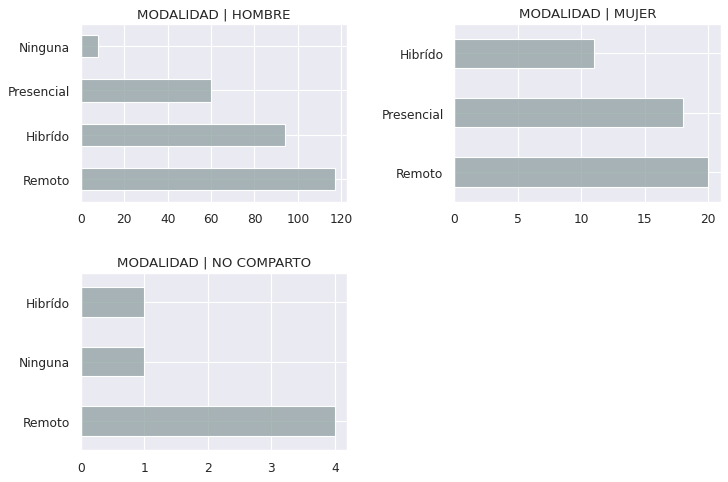

In [264]:
plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(generos.groups.keys()):
    plt.subplot(8, 2, k + 1)
    generos.get_group(v)["modalidad"].value_counts().plot(
        kind="barh",
        title="MODALIDAD | {0}".format(v),
        color=color_neutro_dark,
    )


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Modalida de Trabajo por edad
---

In [242]:
edades = df.groupby("edad_actual_")

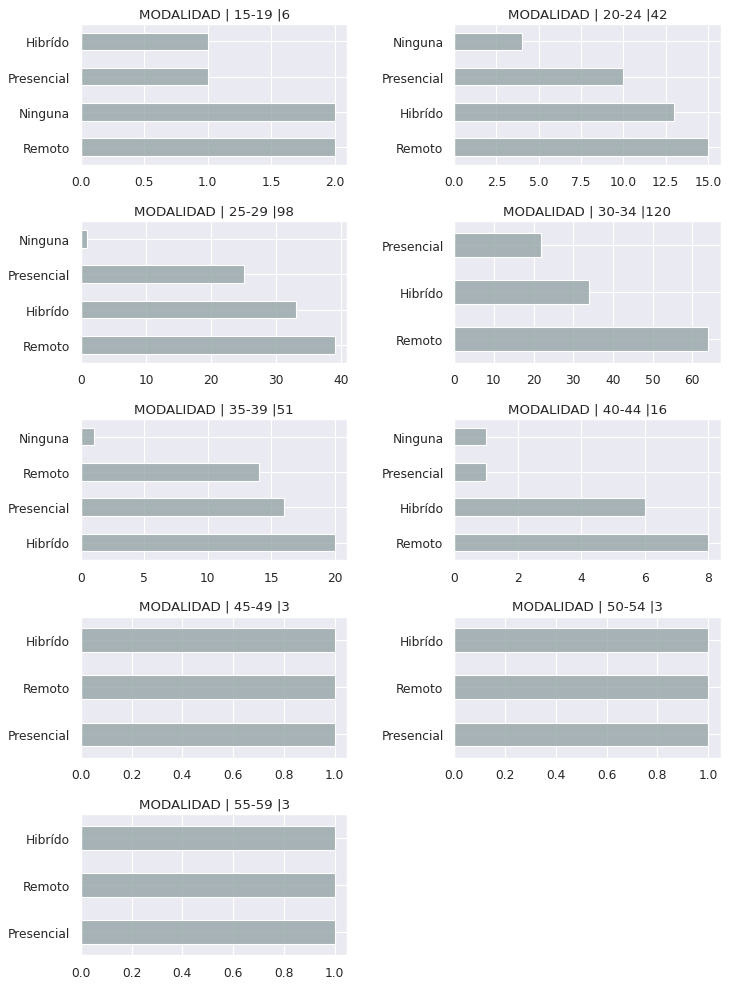

In [243]:
plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(edades.groups.keys()):
    plt.subplot(10, 2, k + 1)
    edades.get_group(v)["modalidad"].value_counts().plot(
        kind="barh",
        title="MODALIDAD | {0} |{1}".format(v, edades.get_group(v).shape[0]),
        color=color_neutro_dark,
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Modalidad segun Salario mensual
---

In [244]:
salarios = df.groupby("salario_mensual")

In [245]:
def absolute_value(val):
    a = numpy.round(val / 100.0 * sizes.sum(), 0)
    return a

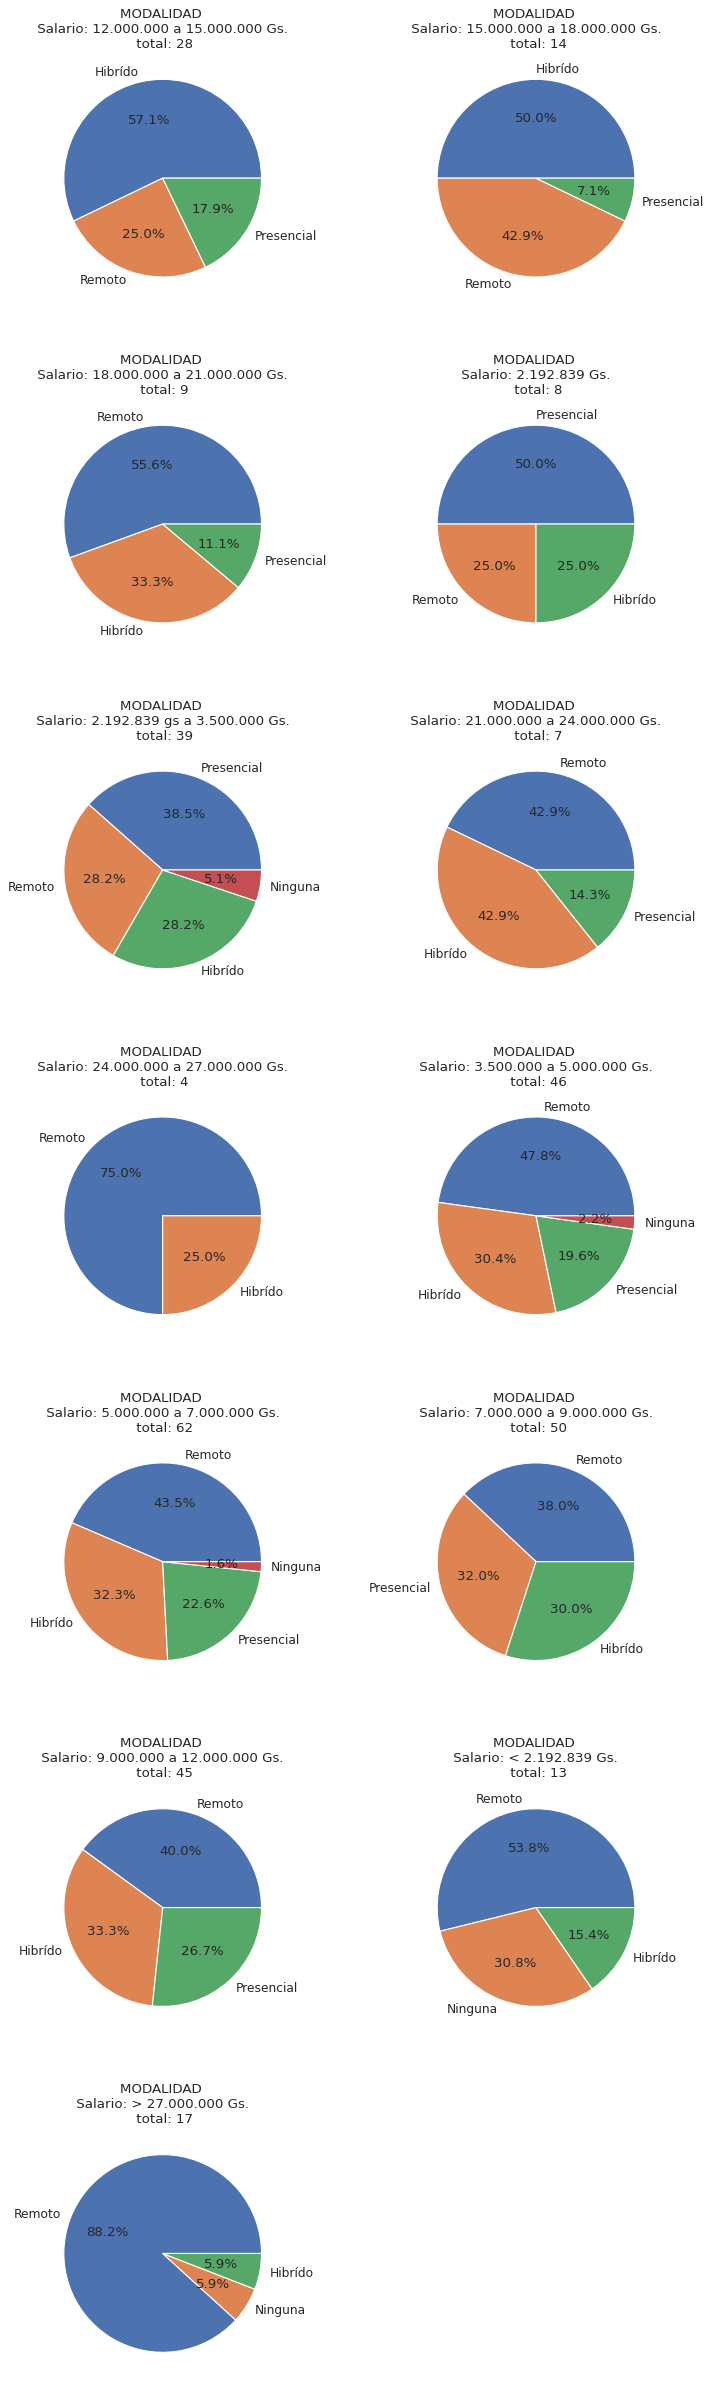

In [247]:
plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(salarios.groups.keys()):
    plt.subplot(10, 2, k + 1)
    salarios.get_group(v)["modalidad"].value_counts(normalize=True).plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        title="MODALIDAD \n Salario: {0} \n total: {1}".format(
            v, salarios.get_group(v).shape[0]
        ),
        # color=color_neutro_dark
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.4)

# Modalidad de Trabajo segun Educacion

In [272]:
edu_df = make_df(df, df["educación"])

<AxesSubplot:title={'center':'Educacion'}, ylabel='cat'>

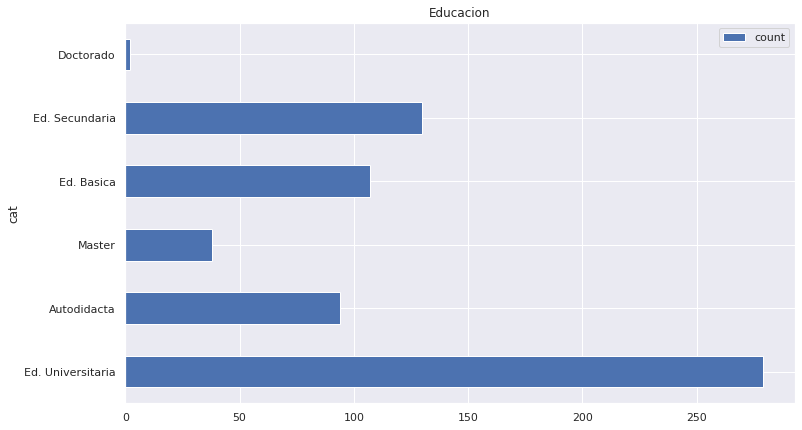

In [276]:
edu_df.plot(kind="barh", title="Educacion")

/home/torrezmn/Documents/DS_ENV/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


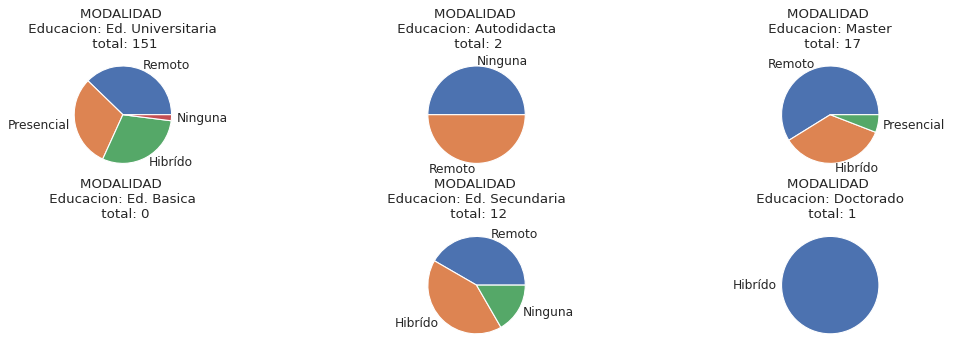

In [294]:
plt.figure(figsize=(15, 30), dpi=80)

for k, v in enumerate(edu_df.index):
    plt.subplot(20, 3, k + 1)
    df.loc[df["educación"] == v]["modalidad"].value_counts(normalize=True).plot(
        kind="pie",
        title="MODALIDAD \n Educacion: {0} \n total: {1}".format(
            v, df.loc[df["educación"] == v].shape[0]
        ),
        label=""
        # color=color_neutro_dark
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.4)

# Modalidad segun tipo de trabajo

In [299]:
tipo_trabajo_df = make_df(df, df["tipo_de_trabajo"])

<AxesSubplot:ylabel='cat'>

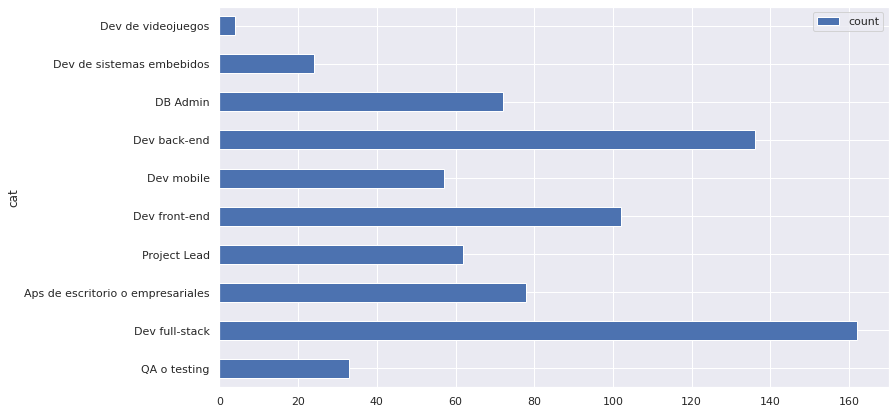

In [301]:
tipo_trabajo_df.plot(kind="barh")

/home/torrezmn/Documents/DS_ENV/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


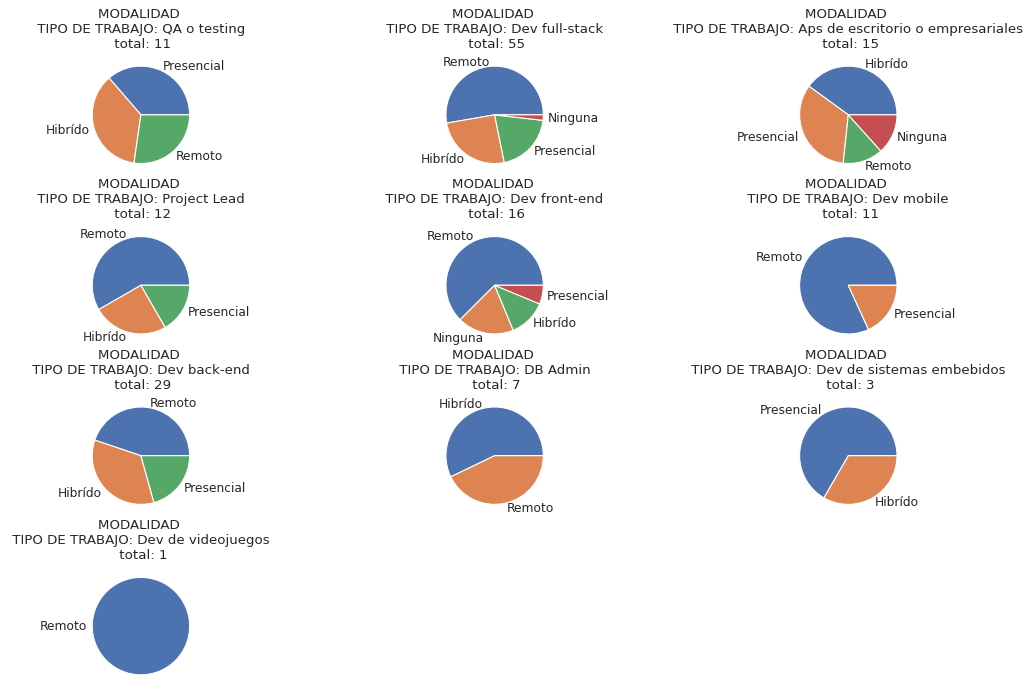

In [302]:
plt.figure(figsize=(15, 30), dpi=80)

for k, v in enumerate(tipo_trabajo_df.index):
    plt.subplot(20, 3, k + 1)
    df.loc[df["tipo_de_trabajo"] == v]["modalidad"].value_counts(normalize=True).plot(
        kind="pie",
        title="MODALIDAD \n TIPO DE TRABAJO: {0} \n total: {1}".format(
            v, df.loc[df["tipo_de_trabajo"] == v].shape[0]
        ),
        label=""
        # color=color_neutro_dark
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.4)

In [306]:
df.columns

Index(['marca_temporal', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'codificar_por_trabajo', 'experiencia_en_ti',
       'experiencia_en_codificación_',
       'primera_línea_de_código_en_una_máquina', 'educación',
       'carreras_o_especialidades', 'importancia_educación_formal', 'género',
       'edad_actual_', 'salario_mensual',
       'programación_scripting_y_lenguajes_de_marcado',
       'librerías_o_web_frameworks',
       'otras_frameworks_librerías_y_herramientas', 'base_de_datos',
       'plataformas', 'lenguaje_favorito', 'lenguaje_más_odiado',
       'framework_favorito', 'framework_más_odiado', 'herramientas'],
      dtype='object')

### MODALIDAD SEGUN EXPERIENCIA EN TI

In [308]:
exp_ti = df.groupby("experiencia_en_ti")

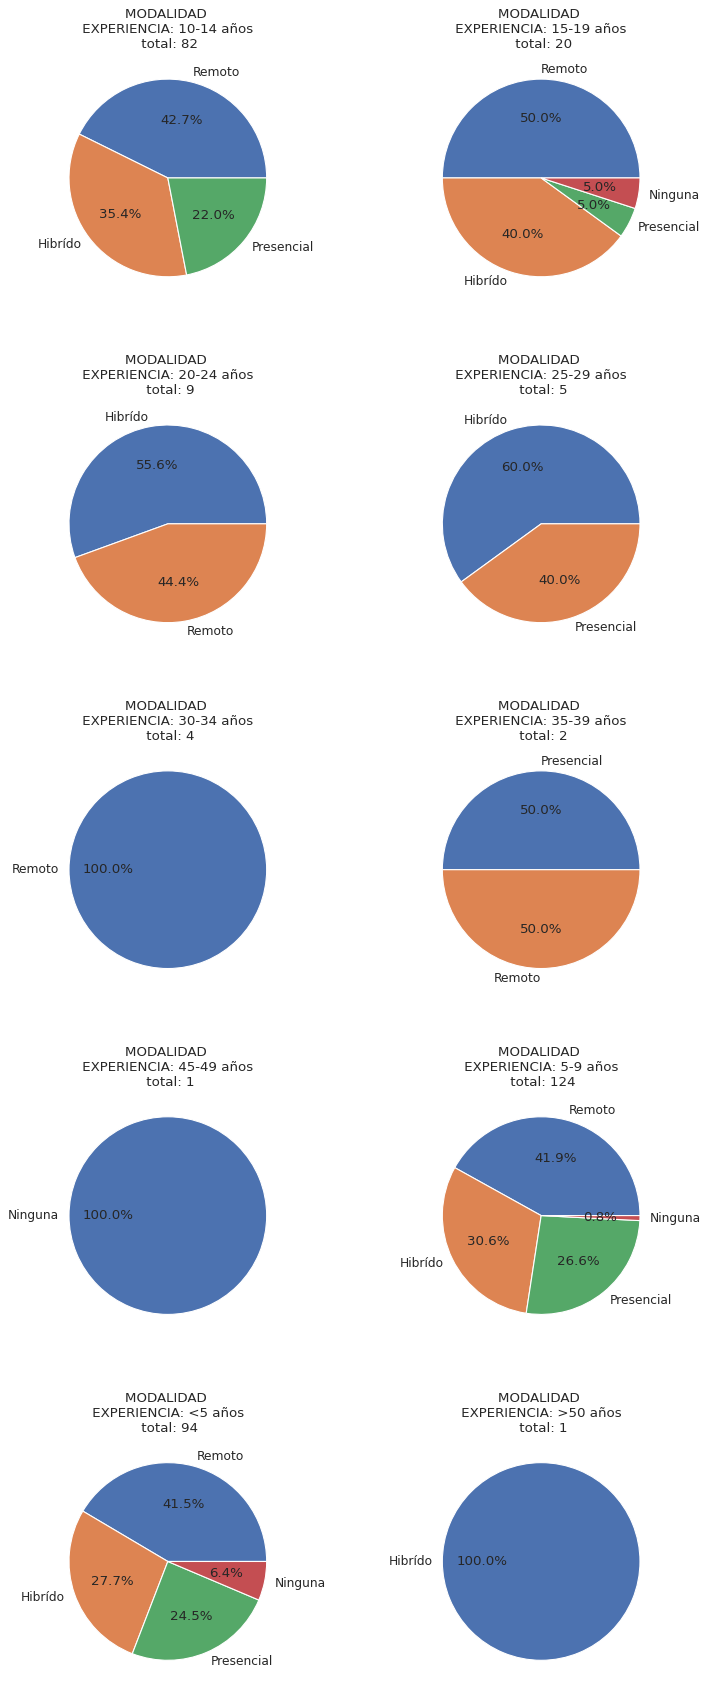

In [312]:
plt.figure(figsize=(10, 30), dpi=80)

for k, v in enumerate(exp_ti.groups.keys()):
    plt.subplot(10, 2, k + 1)
    exp_ti.get_group(v)["modalidad"].value_counts(normalize=True).plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        title="MODALIDAD \n EXPERIENCIA: {0} años \n total: {1}".format(
            v, exp_ti.get_group(v).shape[0]
        ),
        # color=color_neutro_dark
    )

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.4)